## Introduction

Again I will be working with our edited Reddit-Dataframe from the previous journals. For this journal I will change the tokenizer by not making the words lowercase. This allows us to see if words with all caps ("WOW") indicate sarcasm. Also, instead of a CountVectorizer I will use a TF-IDF to give the tokens weight. Then I will re-run a Logisitic Regression and Decission Tree Classifier.

Let's load in our libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

And our dataset. This is the kaggle dataset from Reddit that we edited in the previous journals. We will drop "parent comment" again

In [3]:
df = pd.read_csv('/Users/lokikeeler/Downloads/train-balanced-sarcasm_2.csv')

In [4]:
df.head()

,label,comment,score,ups,downs,date,created_utc,parent_comment,year,SUB_2007scape,...,SUB_television,SUB_tf2,SUB_todayilearned,SUB_trees,SUB_ukpolitics,SUB_unitedkingdom,SUB_videos,SUB_worldnews,SUB_wow,SUB_xboxone
0,0,NC and NH.,2,-1,-1,2016-10-01,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",2016,False,...,False,False,False,False,False,False,False,False,False,False
1,0,You do know west teams play against west teams...,-4,-1,-1,2016-11-01,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,2016,False,...,False,False,False,False,False,False,False,False,False,False
2,0,"They were underdogs earlier today, but since G...",3,3,0,2016-09-01,2016-09-22 21:45:37,They're favored to win.,2016,False,...,False,False,False,False,False,False,False,False,False,False
3,0,"This meme isn't funny none of the ""new york ni...",-8,-1,-1,2016-10-01,2016-10-18 21:03:47,deadass don't kill my buzz,2016,False,...,False,False,False,False,False,False,False,False,False,False
4,0,"I don't pay attention to her, but as long as s...",0,0,0,2016-09-01,2016-09-02 10:35:08,do you find ariana grande sexy ?,2016,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df = df.drop(columns='parent_comment')

This is the same tokenizer, except now we will not make everything lowercase

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    stemmer = nltk.stem.PorterStemmer()
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'')
     

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lokikeeler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Again we will make our y the sarcasm label and our X everything else, then do a test/train split

In [31]:
X = df.drop(columns='label')
y = df['label']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
X_train.shape

(384932, 107)

This time instead of a Count Vectorizer we will use a TF-IDF. We can customize this to make sure all words occur at least 5 times, and we can apply an n-gram as well. 

In [42]:
# using our custom tokenizer in TfidfVectorizer

tfidf = TfidfVectorizer(
                        min_df=5,
                        tokenizer=my_tokenizer, 
                        ngram_range=(1,3)
                        )

In [43]:
tfidf.fit(X_train['comment'])

X_train_transformed = tfidf.transform(X_train['comment'])
X_test_transformed = tfidf.transform(X_test['comment'])

X_train_transformed.shape

/Users/lokikeeler/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(384932, 63771)

Now let's run a Logistic Regression on our TFIDF transformed data

In [44]:
np.random.seed(123)

# Fitting a model
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.6988299232072158
Test score: 0.6823703416337318


Excellent! The logistic model in the previous journal scored a 64.5%, so this was nearly a 4% increase! Our models are getting better and better. We can look into precision and recall scores as well 

In [48]:
y_pred = logreg.predict(X_test_transformed)
precision_score(y_test, y_pred)

0.7042694258275685

In [52]:
recall_score(y_test, y_pred)

0.6792830297773923

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               53831               24666
Actual Positive               27734               58741


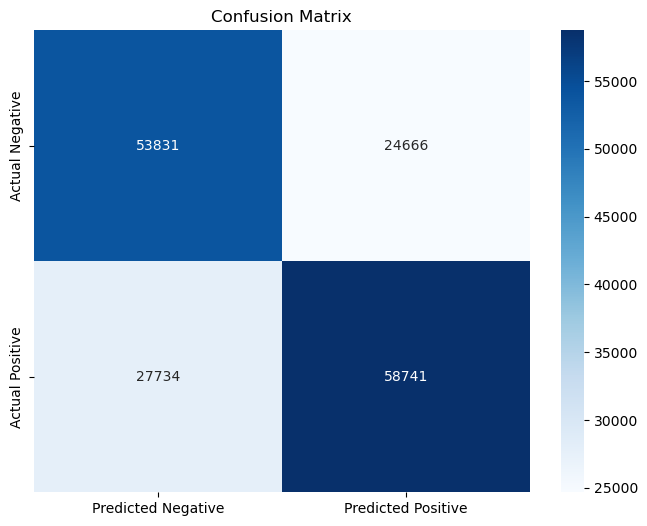

In [56]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(cm_df)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

Not only do we have the best accuracy thus far, but we also have the best precision and recall scores out of all our models thus far (in the previous journals). This shows our model is predicting sarcasm better overall. This is great, but let's see how our Decision Tree Classifier does

In [45]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth=10)
DT_model.fit(X_train_transformed, y_train)

# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train_transformed, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test_transformed, y_test)}")

DT training set accuracy: 0.5573244105452392
DT test set accuracy: 0.5564156341682225


In [53]:
y_pred_2 = DT_model.predict(X_test_transformed)
precision_score(y_test, y_pred_2)

0.8099300699300699

In [54]:
recall_score(y_test, y_pred_2)

0.20090199479618387

Yikes, not only the is the accuracy poor, but the recall score has gone down tremendously! This model, despite having a high precision score, is having trouble predicting positive sentiment!

## Conclusion

With the TF IDF and tokenizer edits we were able to increase the accuracy, precision, and recall scores with a logistic regression model. Still, our Decision Tree Classifier performed poorly. In the future journals I plan to work on improving my Decision Tree, as well as adding a Random Forrest.